This notebook looks at the NOAA data off the west coast of BC and US.

In [51]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sets import Set
import calendar
import seaborn as sns
import csvWOD

sns.set()

%matplotlib inline

The following cell loads in ALL the WOD13 data off the west coast of BC and the US. There is over 500MB of data parsed here, and so it may take a while (despite csvWOD_readcasts being relatively optimized to read large files).

In [58]:
cast_inf = csvWOD_readcasts("../../5_WOD13_Data/WOD13_002/ocldb1431635442.6176.CTD.csv")
cast_inf.extend(csvWOD_readcasts("../../5_WOD13_Data/WOD13_002/ocldb1431635442.6176.OSD.csv"))

Setup the area to focus in on here, and plot it. For this notebook, we'll focus in on the area around LC12.

In [59]:
FOCUS_LON_MIN = -126-(50.0/60.0)
FOCUS_LON_MAX = -126-(20.0/60.0)
FOCUS_LAT_MIN = 48
FOCUS_LAT_MAX = 48+(40.0/60.0)

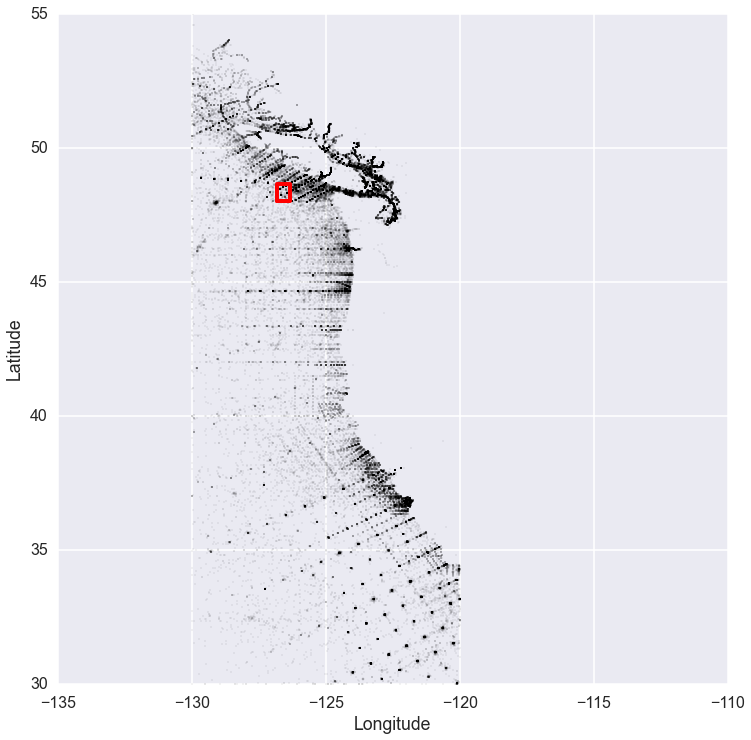

TOTAL CASTS AVAILABLE :  135748
YEARS AVAILABLE       :  1911 --- 2014


In [79]:
plt.figure(figsize=(12,12))

sns.set_style("darkgrid")
sns.set_context("poster")

lats = []
lons = []
yrs = Set([])
for cast in cast_inf:
    if 'Temperatur' in cast['Variables'] and 'Salinity' in cast['Variables']:
        lats.append(cast['Latitude'])
        lons.append(cast['Longitude'])    
        yrs.add(cast['Year'])

plt.plot(lons,lats,'.k',ms=1)
x_bd_box = [FOCUS_LON_MIN,FOCUS_LON_MAX,FOCUS_LON_MAX,FOCUS_LON_MIN,FOCUS_LON_MIN]
y_bd_box = [FOCUS_LAT_MIN,FOCUS_LAT_MIN,FOCUS_LAT_MAX,FOCUS_LAT_MAX,FOCUS_LAT_MIN]
plt.plot(x_bd_box,y_bd_box,'-r',lw=4)
plt.ylim((30,55))
plt.xlim((-135,-110))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

print "TOTAL CASTS AVAILABLE : ", str(len(cast_inf))
print "YEARS AVAILABLE       : ", str(min(yrs)), "---", str(max(yrs))

Focus in on the area marked by a red rectangle above.

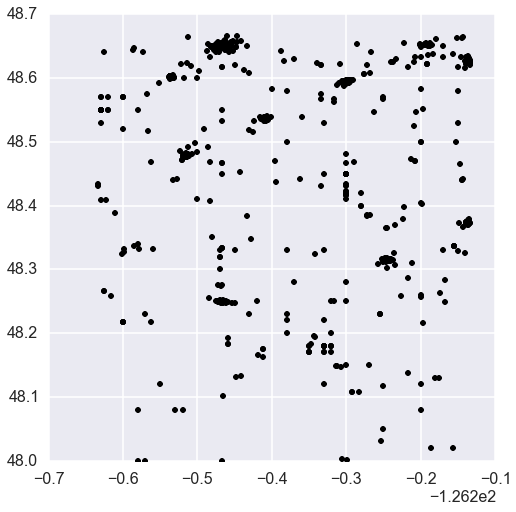

TOTAL NUMBER OF DATASETS:  1123


In [80]:
zm_casts = []

zm_casts = csvWOD_filter_region(cast_inf,FOCUS_LON_MIN,FOCUS_LON_MAX,FOCUS_LAT_MIN,FOCUS_LAT_MAX)

plt.figure(figsize=(8,8))

zm_lons = []
zm_lats = []

for ii in range(0,len(zm_casts)):
    zm_lons.append(zm_casts[ii]['Longitude'])
    zm_lats.append(zm_casts[ii]['Latitude'])
    
plt.plot(zm_lons,zm_lats,'.k')
plt.show()

print "TOTAL NUMBER OF DATASETS: ", str(len(zm_casts))

The following cell splits up all the data into months, and plots it out. It shows the relative amount of data available for each month of the year.

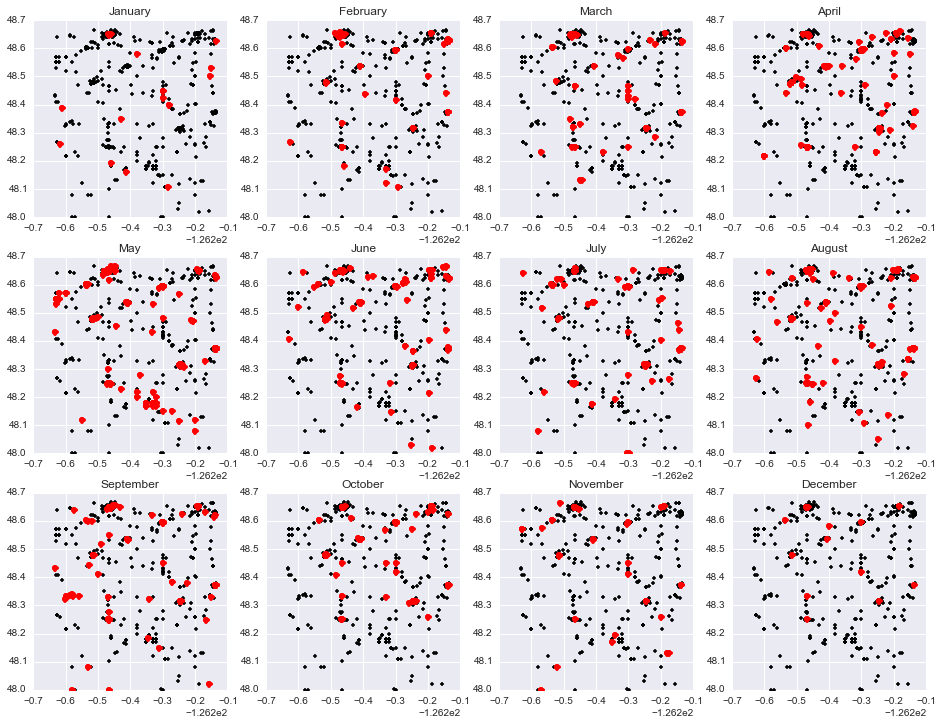

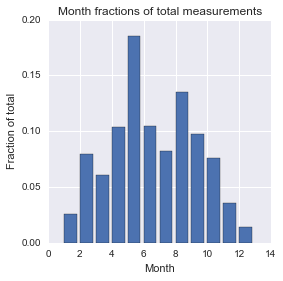

In [ ]:
mnth_fracs = []

sns.set_context('notebook')
plt.figure(figsize=(16,12))
for mnth in range(1,13):
    plt.subplot(3,4,mnth)
    mnth_filt = csvWOD_filter_month(zm_casts,mnth)

    mnth_lons = []
    mnth_lats = []
    for ii in range(0,len(mnth_filt)):
        mnth_lons.append(mnth_filt[ii]['Longitude'])
        mnth_lats.append(mnth_filt[ii]['Latitude'])
    plt.plot(zm_lons,zm_lats,'.k')
    plt.plot(mnth_lons,mnth_lats,'or')
    plt.title(calendar.month_name[mnth])

    mnth_fracs.append(float(len(mnth_filt))/float(len(zm_casts)))

plt.figure(figsize=(4,4))
plt.bar(np.arange(1,13),mnth_fracs)
plt.title('Month fractions of total measurements')
plt.xlabel('Month')
plt.ylabel('Fraction of total')
plt.show()

sns.set_context('poster')

Now look at how the TS properties change over the course of a year. The data used here is over a very large span of time.

In [ ]:
fig,axes=plt.subplots(3,4,figsize=(16,12),sharex=True,sharey=True)

dat_set = csvWOD_filter_variables(zm_casts,['Temperatur','Salinity'])

all_yrs = Set([])

for cnt,row in enumerate(axes):
    for cnt2,ax in enumerate(row):
        mnth = (cnt*4)+cnt2+1
        #plt.subplot(3,4,mnth)
        mnth_filt = csvWOD_filter_month(dat_set,mnth)
    
        #mnth_lons = []
        #mnth_lats = []
        mnth_temp = []
        mnth_saln = []
        for ii in range(0,len(mnth_filt)):
            all_yrs.add(mnth_filt[ii]['Year'])
            #mnth_lons.append(mnth_filt[ii]['Longitude'])
            #mnth_lats.append(mnth_filt[ii]['Latitude'])
            mnth_temp.extend(mnth_filt[ii]['Temperatur'])
            mnth_saln.extend(mnth_filt[ii]['Salinity'])
        #plt.plot(zm_lons,zm_lats,'.k')
        ax.plot(mnth_saln,mnth_temp,'.k')
        ax.set_xlim((29,35))
        ax.set_ylim((0,20))
        ax.set_title(calendar.month_name[mnth])
        
plt.suptitle('T-S vs Month for Area Around LC12',fontsize=24)
#plt.supxlabel('S')
#plt.supylabel('T')
plt.show()

print "DATA FROM: ", str(min(all_yrs)), "---", str(max(all_yrs))

The above plots give a general idea of how offshore TS properties change over the course of a year.